In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("luvathoms/portugal-real-estate-2024")

print("Path to dataset files:", path)

100%|██████████| 2.66M/2.66M [00:03<00:00, 739kB/s]

Extracting files...
Path to dataset files: C:\Users\pedro\.cache\kagglehub\datasets\luvathoms\portugal-real-estate-2024\versions\8


In [85]:
import pandas as pd

df = pd.read_csv(path+'\portugal_listinigs.csv')

In [7]:
df.drop_duplicates(inplace=True, keep='first')

In [8]:
# Dataframe summary

def summary(df):
    #print(f'data shape: {filtered_df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

Data Type  Missing#  Missing%  Dups  Uniques   Count  \
Price                   float64       270  0.002291     0     4524  117608   
District                 object         0  0.000000     0       25  117878   
City                     object         0  0.000000     0      273  117878   
Town                     object         2  0.000017     0     2251  117876   
Type                     object        15  0.000127     0       21  117863   
EnergyCertificate        object        13  0.000110     0       12  117865   
Floor                    object     91779  0.778593     0       19   26099   
Parking                 float64       146  0.001239     0        4  117732   
HasParking               object     53996  0.458067     0        2   63882   
ConstructionYear        float64     40262  0.341557     0      124   77616   
TotalArea               float64      7123  0.060427     0     7252  110755   
GrossArea               float64     91864  0.779314     0     2267   26014   
EnergyEfficiencyLevel    object     63912  0.542188     0       11   53966   
PublishDate              object     96491  0.818567     0    21367   21387   
Garage                   object     63912  0.542188     0        2   53966   
Elevator                 object        30  0.000255     0        2  117848   
ElectricCarsCharging     object     63912  0.542188     0        2   53966   
TotalRooms              float64     52370  0.444273     0       58   65508   
NumberOfBedrooms        float64     81193  0.688788     0       22   36685   
NumberOfWC              float64     70655  0.599391     0       26   47223   
ConservationStatus       object    102312  0.867948     0        6   15566   
LivingArea              float64     27345  0.231977     0     2947   90533   
LotSize                 float64     85347  0.724028     0     6537   32531   
BuiltArea               float64     96395  0.817752     0     6647   21483   
NumberOfBathrooms       float64      5864  0.049746     0       44  112014   

                             Min            Max        Average  \
Price                        1.0   1380000000.0  369763.444142   
District                     NaN            NaN            NaN   
City                         NaN            NaN            NaN   
Town                         NaN            NaN            NaN   
Type                         NaN            NaN            NaN   
EnergyCertificate            NaN            NaN            NaN   
Floor                        NaN            NaN            NaN   
Parking                      0.0            3.0         0.5538   
HasParking                   NaN            NaN            NaN   
ConstructionYear          1900.0         2024.0    1988.532609   
TotalArea             -7196067.0  61420071105.0  589763.713385   
GrossArea                   -7.0     12750000.0    2927.940647   
EnergyEfficiencyLevel        NaN            NaN            NaN   
PublishDate                  NaN            NaN            NaN   
Garage                       NaN            NaN            NaN   
Elevator                     NaN            NaN            NaN   
ElectricCarsCharging         NaN            NaN            NaN   
TotalRooms                   0.0         2751.0       3.192465   
NumberOfBedrooms             0.0           21.0       2.689083   
NumberOfWC                 -15.0           59.0         0.4206   
ConservationStatus           NaN            NaN            NaN   
LivingArea                   0.0      5429000.0    1510.732407   
LotSize                      0.0    992301000.0   63657.036089   
BuiltArea                   -1.0     12750000.0    3416.130458   
NumberOfBathrooms          -13.0           90.0       1.524658   

                      Standard Deviation           First Value  \
Price                      4074358.56897              250000.0   
District                             NaN                  Faro   
City                                 NaN  São Brás de Alportel   
Town        

In [86]:
selected_types = ['Apartment', 'House']
# Filter the dataset
filtered_df = df[df['Type'].isin(selected_types)]
filtered_df.reset_index(drop=True, inplace=True)

In [10]:
summary(df)

Data Type  Missing#  Missing%  Dups  Uniques   Count  \
Price                   float64       270  0.002291     0     4524  117608   
District                 object         0  0.000000     0       25  117878   
City                     object         0  0.000000     0      273  117878   
Town                     object         2  0.000017     0     2251  117876   
Type                     object        15  0.000127     0       21  117863   
EnergyCertificate        object        13  0.000110     0       12  117865   
Floor                    object     91779  0.778593     0       19   26099   
Parking                 float64       146  0.001239     0        4  117732   
HasParking               object     53996  0.458067     0        2   63882   
ConstructionYear        float64     40262  0.341557     0      124   77616   
TotalArea               float64      7123  0.060427     0     7252  110755   
GrossArea               float64     91864  0.779314     0     2267   26014   
EnergyEfficiencyLevel    object     63912  0.542188     0       11   53966   
PublishDate              object     96491  0.818567     0    21367   21387   
Garage                   object     63912  0.542188     0        2   53966   
Elevator                 object        30  0.000255     0        2  117848   
ElectricCarsCharging     object     63912  0.542188     0        2   53966   
TotalRooms              float64     52370  0.444273     0       58   65508   
NumberOfBedrooms        float64     81193  0.688788     0       22   36685   
NumberOfWC              float64     70655  0.599391     0       26   47223   
ConservationStatus       object    102312  0.867948     0        6   15566   
LivingArea              float64     27345  0.231977     0     2947   90533   
LotSize                 float64     85347  0.724028     0     6537   32531   
BuiltArea               float64     96395  0.817752     0     6647   21483   
NumberOfBathrooms       float64      5864  0.049746     0       44  112014   

                             Min            Max        Average  \
Price                        1.0   1380000000.0  369763.444142   
District                     NaN            NaN            NaN   
City                         NaN            NaN            NaN   
Town                         NaN            NaN            NaN   
Type                         NaN            NaN            NaN   
EnergyCertificate            NaN            NaN            NaN   
Floor                        NaN            NaN            NaN   
Parking                      0.0            3.0         0.5538   
HasParking                   NaN            NaN            NaN   
ConstructionYear          1900.0         2024.0    1988.532609   
TotalArea             -7196067.0  61420071105.0  589763.713385   
GrossArea                   -7.0     12750000.0    2927.940647   
EnergyEfficiencyLevel        NaN            NaN            NaN   
PublishDate                  NaN            NaN            NaN   
Garage                       NaN            NaN            NaN   
Elevator                     NaN            NaN            NaN   
ElectricCarsCharging         NaN            NaN            NaN   
TotalRooms                   0.0         2751.0       3.192465   
NumberOfBedrooms             0.0           21.0       2.689083   
NumberOfWC                 -15.0           59.0         0.4206   
ConservationStatus           NaN            NaN            NaN   
LivingArea                   0.0      5429000.0    1510.732407   
LotSize                      0.0    992301000.0   63657.036089   
BuiltArea                   -1.0     12750000.0    3416.130458   
NumberOfBathrooms          -13.0           90.0       1.524658   

                      Standard Deviation           First Value  \
Price                      4074358.56897              250000.0   
District                             NaN                  Faro   
City                                 NaN  São Brás de Alportel   
Town        

In [11]:
# drop all the rows with null number of bedrooms
filtered_df = filtered_df.dropna(subset=['NumberOfBedrooms'])

In [12]:
#reset the index
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64       102  0.003180     0     2930  31975   
District                 object         0  0.000000     0       24  32077   
City                     object         0  0.000000     0      267  32077   
Town                     object         0  0.000000     0     2044  32077   
Type                     object         0  0.000000     0        2  32077   
EnergyCertificate        object         0  0.000000     0       11  32077   
Floor                    object     32077  1.000000     0        0      0   
Parking                 float64         0  0.000000     0        2  32077   
HasParking               object     32077  1.000000     0        0      0   
ConstructionYear        float64      2913  0.090813     0      119  29164   
TotalArea               float64         0  0.000000     0      907  32077   
GrossArea               float64     32077  1.000000     0        0      0   
EnergyEfficiencyLevel    object         0  0.000000     0       11  32077   
PublishDate              object     17799  0.554884     0    14271  14278   
Garage                   object         0  0.000000     0        2  32077   
Elevator                 object         0  0.000000     0        2  32077   
ElectricCarsCharging     object         0  0.000000     0        2  32077   
TotalRooms              float64     15752  0.491068     0       33  16325   
NumberOfBedrooms        float64         0  0.000000     0       22  32077   
NumberOfWC              float64      3695  0.115192     0       15  28382   
ConservationStatus       object     19747  0.615612     0        6  12330   
LivingArea              float64         2  0.000062     0      857  32075   
LotSize                 float64     17332  0.540325     0     2824  14745   
BuiltArea               float64     16412  0.511644     0     4806  15665   
NumberOfBathrooms       float64       110  0.003429     0       22  31967   

                          Min         Max       Average Standard Deviation  \
Price                     1.0  16800000.0  404689.07121      513277.002387   
District                  NaN         NaN           NaN                NaN   
City                      NaN         NaN           NaN                NaN   
Town                      NaN         NaN           NaN                NaN   
Type                      NaN         NaN           NaN                NaN   
EnergyCertificate         NaN         NaN           NaN                NaN   
Floor                     NaN         NaN           NaN                NaN   
Parking                   0.0         1.0      0.393117            0.48845   
HasParking                NaN         NaN           NaN                NaN   
ConstructionYear       1900.0      2024.0   1991.449047          27.341197   
TotalArea              -271.0    420000.0     251.56249        4359.129363   
GrossArea                 NaN         NaN           NaN                NaN   
EnergyEfficiencyLevel     NaN         NaN           NaN                NaN   
PublishDate               NaN         NaN           NaN                NaN   
Garage                    NaN         NaN           NaN                NaN   
Elevator                  NaN         NaN           NaN                NaN   
ElectricCarsCharging      NaN         NaN           NaN                NaN   
TotalRooms                0.0      2751.0      4.521409          21.636578   
NumberOfBedrooms          0.0        21.0      2.799389           1.432395   
NumberOfWC              -15.0        59.0      0.541998            1.00654   
ConservationStatus        NaN         NaN           NaN                NaN   
LivingArea                0.0    470300.0    230.122463        4268.256274   
LotSize                   0.0  48750000.0   9485.420549      415270.341695   
BuiltArea                -1.0    470300.0    321.846559        5588.551914   
NumberOfBathrooms       -13.0        62.0      2.116871           1.4

In [13]:
# to test ydata_profiling whith a smaller data set
filtered_df.drop(["GrossArea", "HasParking", "Floor", "TotalRooms","PublishDate","ConservationStatus", "LotSize","BuiltArea"], axis=1, inplace=True) #TotalRooms
filtered_df.dropna(subset=['Price'],inplace=True)



In [14]:
filtered_df = filtered_df.reset_index(drop=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64         0  0.000000  1104     2930  31975   
District                 object         0  0.000000  1104       24  31975   
City                     object         0  0.000000  1104      267  31975   
Town                     object         0  0.000000  1104     2044  31975   
Type                     object         0  0.000000  1104        2  31975   
EnergyCertificate        object         0  0.000000  1104       11  31975   
Parking                 float64         0  0.000000  1104        2  31975   
ConstructionYear        float64      2873  0.089851  1104      119  29102   
TotalArea               float64         0  0.000000  1104      906  31975   
EnergyEfficiencyLevel    object         0  0.000000  1104       11  31975   
Garage                   object         0  0.000000  1104        2  31975   
Elevator                 object         0  0.000000  1104        2  31975   
ElectricCarsCharging     object         0  0.000000  1104        2  31975   
NumberOfBedrooms        float64         0  0.000000  1104       22  31975   
NumberOfWC              float64      3694  0.115528  1104       15  28281   
LivingArea              float64         2  0.000063  1104      855  31973   
NumberOfBathrooms       float64       110  0.003440  1104       22  31865   

                          Min         Max       Average Standard Deviation  \
Price                     1.0  16800000.0  404689.07121      513277.002387   
District                  NaN         NaN           NaN                NaN   
City                      NaN         NaN           NaN                NaN   
Town                      NaN         NaN           NaN                NaN   
Type                      NaN         NaN           NaN                NaN   
EnergyCertificate         NaN         NaN           NaN                NaN   
Parking                   0.0         1.0      0.392557           0.488327   
ConstructionYear       1900.0      2024.0   1991.396227          27.337954   
TotalArea              -271.0    420000.0    251.711775        4366.071196   
EnergyEfficiencyLevel     NaN         NaN           NaN                NaN   
Garage                    NaN         NaN           NaN                NaN   
Elevator                  NaN         NaN           NaN                NaN   
ElectricCarsCharging      NaN         NaN           NaN                NaN   
NumberOfBedrooms          0.0        21.0      2.798812           1.433486   
NumberOfWC              -15.0        59.0      0.542201           1.007291   
LivingArea                0.0    470300.0    230.276202          4275.0546   
NumberOfBathrooms       -13.0        62.0      2.113918           1.481606   

                      First Value                   Second Value  \
Price                     62000.0                        98000.0   
District                   Aveiro                         Aveiro   
City                         Ovar             Albergaria-a-Velha   
Town                       Válega  Albergaria-a-Velha e Valmaior   
Type                        House                      Apartment   
EnergyCertificate               F                              F   
Parking                       1.0                            0.0   
ConstructionYear           1950.0                         1992.0   
TotalArea                   336.0                           81.0   
EnergyEfficiencyLevel           F                              F   
Garage                      False                          False   
Elevator                    False                          False   
ElectricCarsCharging        False                          False   
NumberOfBedrooms              2.0                            2.0   
NumberOfWC                    NaN                            0.0   
LivingArea                  300.0                           81.0   
NumberOfBathrooms             1.0                            1.0   

     

In [15]:
filtered_df.dropna(subset=['ConstructionYear'],inplace=True)

In [16]:
filtered_df.dropna(subset=['NumberOfWC'],inplace=True)

In [17]:
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64         0  0.000000   613     2490  25816   
District                 object         0  0.000000   613       23  25816   
City                     object         0  0.000000   613      266  25816   
Town                     object         0  0.000000   613     2001  25816   
Type                     object         0  0.000000   613        2  25816   
EnergyCertificate        object         0  0.000000   613       11  25816   
Parking                 float64         0  0.000000   613        2  25816   
ConstructionYear        float64         0  0.000000   613      118  25816   
TotalArea               float64         0  0.000000   613      871  25816   
EnergyEfficiencyLevel    object         0  0.000000   613       11  25816   
Garage                   object         0  0.000000   613        2  25816   
Elevator                 object         0  0.000000   613        2  25816   
ElectricCarsCharging     object         0  0.000000   613        2  25816   
NumberOfBedrooms        float64         0  0.000000   613       21  25816   
NumberOfWC              float64         0  0.000000   613       13  25816   
LivingArea              float64         2  0.000077   613      829  25814   
NumberOfBathrooms       float64         0  0.000000   613       20  25816   

                          Min         Max        Average Standard Deviation  \
Price                   600.0  16800000.0  398724.873624      528665.124165   
District                  NaN         NaN            NaN                NaN   
City                      NaN         NaN            NaN                NaN   
Town                      NaN         NaN            NaN                NaN   
Type                      NaN         NaN            NaN                NaN   
EnergyCertificate         NaN         NaN            NaN                NaN   
Parking                   0.0         1.0       0.363069           0.480894   
ConstructionYear       1900.0      2024.0    1991.512202          27.647259   
TotalArea              -271.0    420000.0     271.351178        4800.070101   
EnergyEfficiencyLevel     NaN         NaN            NaN                NaN   
Garage                    NaN         NaN            NaN                NaN   
Elevator                  NaN         NaN            NaN                NaN   
ElectricCarsCharging      NaN         NaN            NaN                NaN   
NumberOfBedrooms          0.0        21.0        2.85691           1.465484   
NumberOfWC                0.0        14.0       0.524016           0.938742   
LivingArea                0.0    470300.0     230.134346        4235.191714   
NumberOfBathrooms         0.0        24.0       2.103076           1.476902   

                                         First Value        Second Value  \
Price                                        98000.0            220000.0   
District                                      Aveiro              Aveiro   
City                              Albergaria-a-Velha  Oliveira do Bairro   
Town                   Albergaria-a-Velha e Valmaior             Palhaça   
Type                                       Apartment               House   
EnergyCertificate                                  F                   F   
Parking                                          0.0                 0.0   
ConstructionYear                              1992.0              1993.0   
TotalArea                                       81.0               154.0   
EnergyEfficiencyLevel                              F                   F   
Garage                                         False                True   
Elevator                                       False               False   
ElectricCarsCharging                           False               False   
NumberOfBedrooms                                 2.0                 4.0   
NumberOfWC                                       0.0                 1.0

In [18]:
filtered_df.dropna(subset=['LivingArea'],inplace=True)

In [19]:
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64         0       0.0   613     2490  25814   
District                 object         0       0.0   613       23  25814   
City                     object         0       0.0   613      266  25814   
Town                     object         0       0.0   613     2000  25814   
Type                     object         0       0.0   613        2  25814   
EnergyCertificate        object         0       0.0   613       11  25814   
Parking                 float64         0       0.0   613        2  25814   
ConstructionYear        float64         0       0.0   613      118  25814   
TotalArea               float64         0       0.0   613      871  25814   
EnergyEfficiencyLevel    object         0       0.0   613       11  25814   
Garage                   object         0       0.0   613        2  25814   
Elevator                 object         0       0.0   613        2  25814   
ElectricCarsCharging     object         0       0.0   613        2  25814   
NumberOfBedrooms        float64         0       0.0   613       21  25814   
NumberOfWC              float64         0       0.0   613       13  25814   
LivingArea              float64         0       0.0   613      829  25814   
NumberOfBathrooms       float64         0       0.0   613       20  25814   

                          Min         Max        Average Standard Deviation  \
Price                   600.0  16800000.0  398743.563086      528680.240472   
District                  NaN         NaN            NaN                NaN   
City                      NaN         NaN            NaN                NaN   
Town                      NaN         NaN            NaN                NaN   
Type                      NaN         NaN            NaN                NaN   
EnergyCertificate         NaN         NaN            NaN                NaN   
Parking                   0.0         1.0       0.363059           0.480891   
ConstructionYear       1900.0      2024.0    1991.513868          27.646156   
TotalArea              -271.0    420000.0     271.360696        4800.255931   
EnergyEfficiencyLevel     NaN         NaN            NaN                NaN   
Garage                    NaN         NaN            NaN                NaN   
Elevator                  NaN         NaN            NaN                NaN   
ElectricCarsCharging      NaN         NaN            NaN                NaN   
NumberOfBedrooms          0.0        21.0       2.856938           1.465531   
NumberOfWC                0.0        14.0       0.524057           0.938767   
LivingArea                0.0    470300.0     230.134346        4235.191714   
NumberOfBathrooms         0.0        24.0         2.1032           1.476885   

                                         First Value        Second Value  \
Price                                        98000.0            220000.0   
District                                      Aveiro              Aveiro   
City                              Albergaria-a-Velha  Oliveira do Bairro   
Town                   Albergaria-a-Velha e Valmaior             Palhaça   
Type                                       Apartment               House   
EnergyCertificate                                  F                   F   
Parking                                          0.0                 0.0   
ConstructionYear                              1992.0              1993.0   
TotalArea                                       81.0               154.0   
EnergyEfficiencyLevel                              F                   F   
Garage                                         False                True   
Elevator                                       False               False   
ElectricCarsCharging                           False               False   
NumberOfBedrooms                                 2.0                 4.0   
NumberOfWC                                       0.0                 1.0

In [20]:
filtered_df= filtered_df[filtered_df["TotalArea"]>0].reset_index(drop=True)

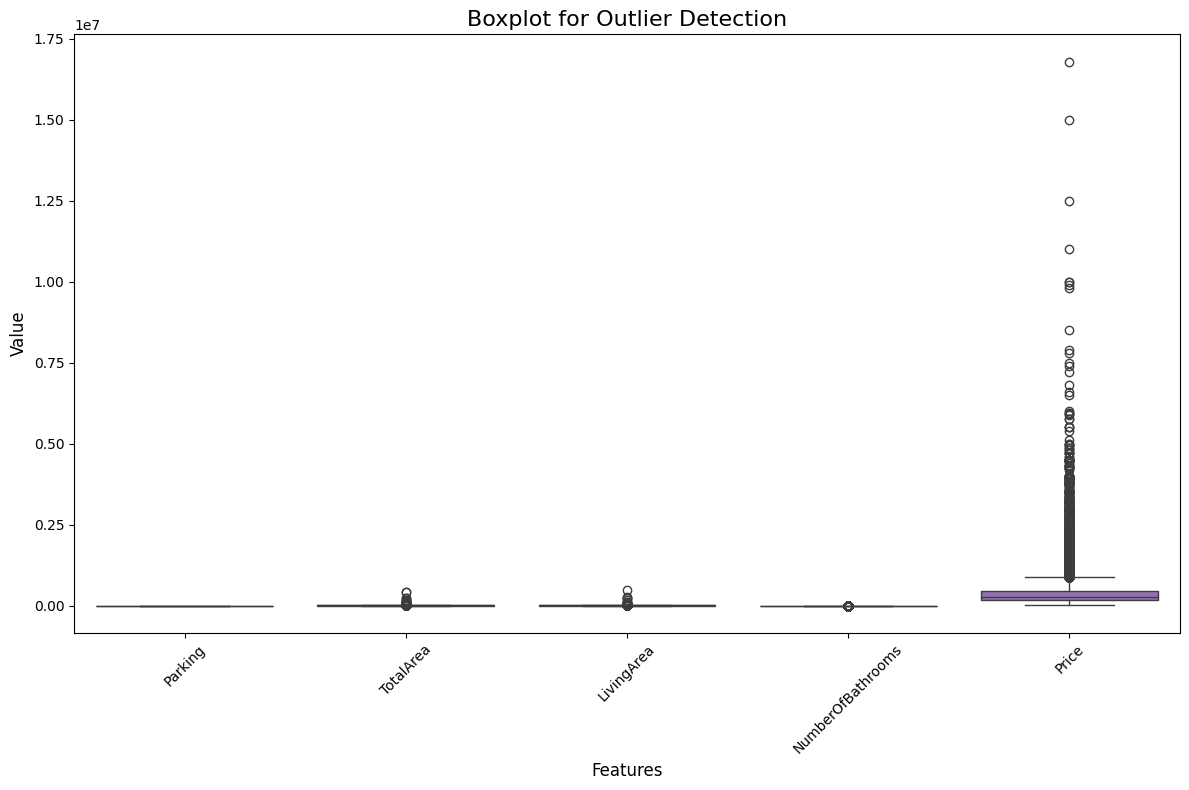

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))

numerical_columns= [ 'Parking','TotalArea', 'LivingArea', 'NumberOfBathrooms','Price']
# Create a boxplot for each numerical column
sns.boxplot(data=filtered_df[numerical_columns])

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

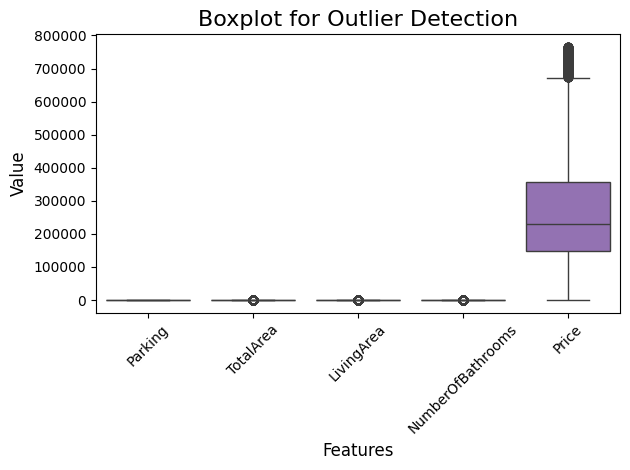

In [22]:
def remove_outliers(df, numerical_columns):
    
    data = df.copy()
    
    for feature in data[numerical_columns].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data
# Remove outliers
filtered_df = remove_outliers(filtered_df, numerical_columns)
# Create a boxplot for each numerical column
sns.boxplot(data=filtered_df[numerical_columns])

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
filtered_df.shape

(21181, 17)

In [24]:
from ydata_profiling import ProfileReport

In [25]:
profile = ProfileReport(filtered_df, title="Apartment/House")

In [26]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
filtered_df.drop("EnergyEfficiencyLevel", axis=1, inplace=True)

In [28]:
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                  float64         0       0.0   494     1883  21181   
District                object         0       0.0   494       23  21181   
City                    object         0       0.0   494      265  21181   
Town                    object         0       0.0   494     1913  21181   
Type                    object         0       0.0   494        2  21181   
EnergyCertificate       object         0       0.0   494       11  21181   
Parking                float64         0       0.0   494        2  21181   
ConstructionYear       float64         0       0.0   494      114  21181   
TotalArea              float64         0       0.0   494      319  21181   
Garage                  object         0       0.0   494        2  21181   
Elevator                object         0       0.0   494        2  21181   
ElectricCarsCharging    object         0       0.0   494        2  21181   
NumberOfBedrooms       float64         0       0.0   494       16  21181   
NumberOfWC             float64         0       0.0   494        6  21181   
LivingArea             float64         0       0.0   494      281  21181   
NumberOfBathrooms      float64         0       0.0   494        6  21181   

                         Min       Max       Average Standard Deviation  \
Price                  600.0  765070.0  263771.75393      169429.527371   
District                 NaN       NaN           NaN                NaN   
City                     NaN       NaN           NaN                NaN   
Town                     NaN       NaN           NaN                NaN   
Type                     NaN       NaN           NaN                NaN   
EnergyCertificate        NaN       NaN           NaN                NaN   
Parking                  0.0       1.0      0.343421           0.474862   
ConstructionYear      1900.0    2024.0   1989.988008           27.53535   
TotalArea               10.0     333.0    116.607431          57.491584   
Garage                   NaN       NaN           NaN                NaN   
Elevator                 NaN       NaN           NaN                NaN   
ElectricCarsCharging     NaN       NaN           NaN                NaN   
NumberOfBedrooms         0.0      18.0      2.582362           1.190805   
NumberOfWC               0.0       5.0      0.429583           0.744581   
LivingArea               0.0     283.0    111.439828          54.831771   
NumberOfBathrooms        0.0       5.0       1.76512           1.025328   

                                        First Value  \
Price                                       98000.0   
District                                     Aveiro   
City                             Albergaria-a-Velha   
Town                  Albergaria-a-Velha e Valmaior   
Type                                      Apartment   
EnergyCertificate                                 F   
Parking                                         0.0   
ConstructionYear                             1992.0   
TotalArea                                      81.0   
Garage                                        False   
Elevator                                      False   
ElectricCarsCharging                          False   
NumberOfBedrooms                                2.0   
NumberOfWC                                      0.0   
LivingArea                                     81.0   
NumberOfBathrooms                               1.0   

                                   Second Value Third Value  
Price                                  290000.0    182000.0  
District                                 Aveiro      Aveiro  
City                       Santa Maria da Feira     Espinho  
Town                  Canedo, Vale e Vila Maior     Espinho  
Type                                      House   Apartment  
EnergyCertificate                             F           D  
Parking                                     0.0         1.0  
ConstructionYear    

In [29]:
filtered_df.to_csv('filtered_df.csv', index=False)

# **Pre Modeling XAI** 

preparing the dataset

In [38]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
categorical_columns = filtered_df.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()

# Apply label encoding to the categorical columns
for i in categorical_columns:
    encoded = encoder.fit_transform(filtered_df[i])
    filtered_df[i]= encoded

bool_columns = filtered_df.select_dtypes(include=['boolean']).columns.tolist()

# Apply label encoding to the categorical columns
for i in bool_columns:
    filtered_df[i]= filtered_df[i].astype(int)



In [39]:

def summary(filtered_df):
    #print(f'data shape: {filtered_df.shape}')
    summ = pd.DataFrame(filtered_df.dtypes, columns=['Data Type'])
    summ['Missing#'] = filtered_df.isna().sum()
    summ['Missing%'] = (filtered_df.isna().sum())/len(filtered_df)
    summ['Dups'] = filtered_df.duplicated().sum()
    summ['Uniques'] = filtered_df.nunique().values
    summ['Count'] = filtered_df.count().values
    desc = pd.DataFrame(filtered_df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = filtered_df.loc[0].values
    summ['Second Value'] = filtered_df.loc[1].values
    summ['Third Value'] = filtered_df.loc[2].values

    display(summ)

summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                  float64         0       0.0   494     1883  21181   
District                 int64         0       0.0   494       23  21181   
City                     int64         0       0.0   494      265  21181   
Town                     int64         0       0.0   494     1913  21181   
Type                     int64         0       0.0   494        2  21181   
EnergyCertificate        int64         0       0.0   494       11  21181   
Parking                float64         0       0.0   494        2  21181   
ConstructionYear       float64         0       0.0   494      114  21181   
TotalArea              float64         0       0.0   494      319  21181   
Garage                   int64         0       0.0   494        2  21181   
Elevator                 int64         0       0.0   494        2  21181   
ElectricCarsCharging     int64         0       0.0   494        2  21181   
NumberOfBedrooms       float64         0       0.0   494       16  21181   
NumberOfWC             float64         0       0.0   494        6  21181   
LivingArea             float64         0       0.0   494      281  21181   
NumberOfBathrooms      float64         0       0.0   494        6  21181   

                         Min       Max        Average  Standard Deviation  \
Price                  600.0  765070.0  263771.753930       169429.527371   
District                 0.0      22.0      11.737831            6.072559   
City                     0.0     264.0     131.498277           73.856912   
Town                     0.0    1912.0     902.686606          549.007415   
Type                     0.0       1.0       0.443416            0.496800   
EnergyCertificate        0.0      10.0       5.393560            2.733464   
Parking                  0.0       1.0       0.343421            0.474862   
ConstructionYear      1900.0    2024.0    1989.988008           27.535350   
TotalArea               10.0     333.0     116.607431           57.491584   
Garage                   0.0       1.0       0.244606            0.429864   
Elevator                 0.0       1.0       0.341627            0.474266   
ElectricCarsCharging     0.0       1.0       0.106935            0.309038   
NumberOfBedrooms         0.0      18.0       2.582362            1.190805   
NumberOfWC               0.0       5.0       0.429583            0.744581   
LivingArea               0.0     283.0     111.439828           54.831771   
NumberOfBathrooms        0.0       5.0       1.765120            1.025328   

                      First Value  Second Value  Third Value  
Price                     98000.0      290000.0     182000.0  
District                      0.0           0.0          0.0  
City                          3.0         198.0         81.0  
Town                         39.0         400.0        632.0  
Type                          0.0           1.0          0.0  
EnergyCertificate             7.0           7.0          5.0  
Parking                       0.0           0.0          1.0  
ConstructionYear           1992.0        1992.0       1990.0  
TotalArea                    81.0         137.0         61.0  
Garage                        0.0           1.0          0.0  
Elevator                      0.0           0.0          0.0  
ElectricCarsCharging          0.0           0.0          0.0  
NumberOfBedrooms              2.0           4.0          2.0  
NumberOfWC                    0.0           1.0          0.0  
LivingArea                   81.0         265.0         76.0  
NumberOfBathrooms             1.0           4.0          2.0

In [40]:
df_X_filtered = filtered_df.drop(["Price"],axis=1)
df_y_filtered = filtered_df['Price']

In [105]:
df_X_filtered.size

317715

## **t-SNE**

information obtained from the following [website](https://www.fabriziomusacchio.com/blog/2023-06-12-tsne_vs_pca/#t-sne)

### Mathematical Background
t-SNE is based on the concept of probability distributions and similarity between data points. Given a high-dimensional dataset with N points, t-SNE constructs probability distributions P and Q over pairs of points in the original space and the embedding space, respectively.

To measure similarity, t-SNE employs the Gaussian kernel:
$$\ p_{j|i} = \frac{\exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{\|x_i - x_k\|^2}{2\sigma_i^2}\right)} $$

Here, 
- $x_i$ and $x_j$ represent data points in the original space 
- $sigma_i$ is the variance of the Gaussian distribution centered at $x_i$
- $p_{j|i}$ denotes the conditional probability of $x_j$ given $x_i$.

**The objective of t-SNE is to minimize the Kullback-Leibler $(KL)$ divergence between the distributions $P$ and $Q$**:

$$ KL(P||Q) = \sum_{i,j} p_{ij} \log \frac{p_{ij}}{q_{ij}} $$

Here,
- $p_{j|i}$ and $q_{j|i}$ represent the joint probabilities of pairs of points in the original and embedding space, respectively.

### Advantages of t-SNEPermalink
1. Non-linear embedding: t-SNE excels at capturing non-linear relationships between data points, making it effective for visualizing complex structures and clusters that PCA might fail to capture.
2. Preservation of local structures: t-SNE emphasizes the preservation of local distances between neighboring points, revealing fine-grained details within clusters that might be lost in PCA’s global perspective.
3. Robustness to outliers: t-SNE is less sensitive to outliers compared to PCA since it focuses on local relationships rather than global variance.


In [41]:
from sklearn.manifold import TSNE

In [92]:
# Perform t-SNE
tsne = TSNE(n_components=2)
X_filtered_tsne = tsne.fit_transform(df_X_filtered)

In [93]:
df_X_filtered_tsne =  pd. DataFrame(X_filtered_tsne)
df_X_filtered_tsne.to_csv('df_X_filtered_tsne.csv', index=False)

In [106]:
print("df_X_filtered_tsne size: "+str(df_X_filtered_tsne.size))
print("df_X_filtered size: "+ str(df_X_filtered.size))

df_X_filtered_tsne size: 42362
df_X_filtered size: 317715


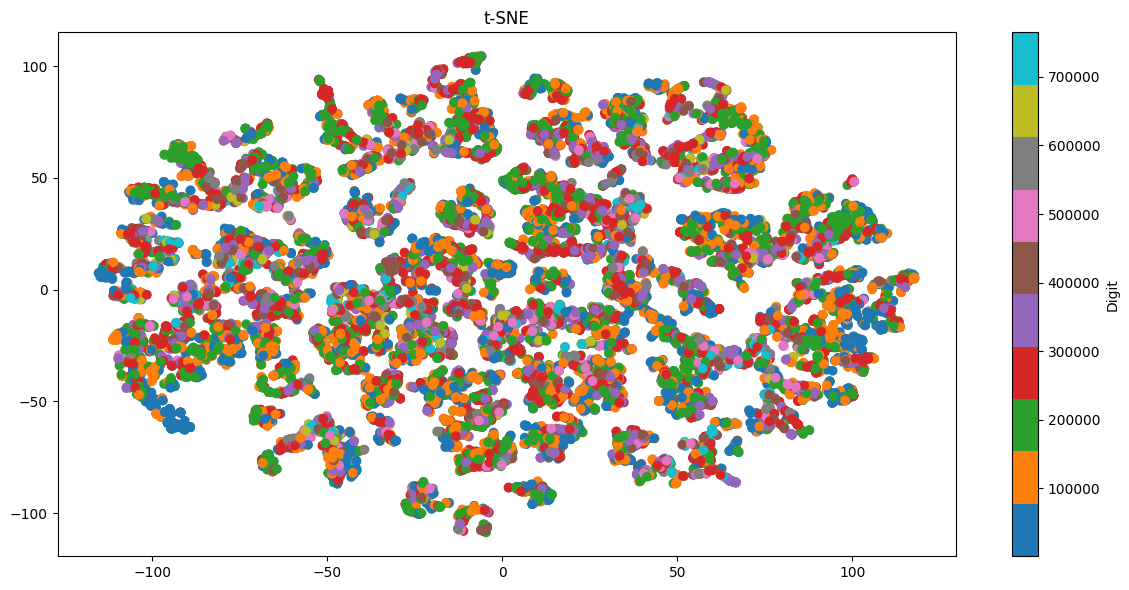

In [98]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_filtered_tsne[:, 0], X_filtered_tsne[:, 1], c=df_y_filtered, cmap='tab10')
plt.colorbar(label='Digit')
plt.title("t-SNE")
plt.tight_layout()
plt.savefig('fig/fig_X_filtered_tsne.png', dpi=200)
plt.show()

## **MMD-Critic Method**

In [57]:
# ! pip install mmd-critic

In [58]:
from mmd_critic import MMDCritic
from mmd_critic.kernels import RBFKernel

In [80]:

# MMD critic with the kernel used for the prototypes being an RBF with sigma=2.5,
# for the criticisms one with sigma=0.025
critic = MMDCritic(df_X_filtered, RBFKernel(2.5), RBFKernel(0.025))


In [81]:
centers = 5      # Number of clusters

protos, _ = critic.select_prototypes(centers)
criticisms, _ = critic.select_criticisms(10, protos)

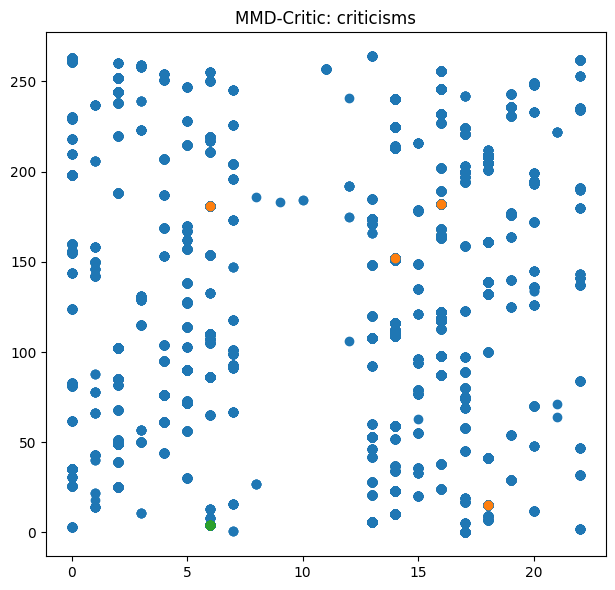

In [97]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(critic.X[:, 0], critic.X[:, 1], cmap='tab10')
plt.title("MMD-Critic: data")

plt.subplot(121)
plt.scatter(protos[:, 0], protos[:, 1], cmap='tab10')
plt.title("MMD-Critic: protos")

plt.subplot(121)
plt.scatter(criticisms[:, 0], criticisms[:, 1], cmap='tab10')
plt.title("MMD-Critic: criticisms")

plt.tight_layout()
plt.savefig('fig/fig_df_X_filtered_MMD_Critic.png', dpi=200)
plt.show()